In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')



In [7]:
df = pd.read_csv(r"C:\Users\dell\Downloads\zomato.csv", encoding='latin-1')
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
df.shape

(56252, 13)

In [9]:
df.info

<bound method DataFrame.info of                                                  address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
56247  Four Points by Sheraton Bengaluru, 43/3, White...   
56248  Number 10, Garudachar Palya, Mahadevapura, Whi...   
56249  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56250  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56251  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                           

In [11]:
df.isnull().sum()


address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [13]:
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [7]:
# df = df.drop(columns = ['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'])

df = df.drop(['address', 'phone', 'rest_type', 'dish_liked'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet


In [15]:
df.shape

(56252, 13)

In [17]:
df.info

<bound method DataFrame.info of                                                  address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
56247  Four Points by Sheraton Bengaluru, 43/3, White...   
56248  Number 10, Garudachar Palya, Mahadevapura, Whi...   
56249  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56250  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56251  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                           

In [19]:
df.drop_duplicates(inplace = True)

df.shape

(40549, 13)

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [23]:
#Data Cleaning
df.drop_duplicates(inplace=True)


In [25]:

# Convert rate column to string first
df['rate'] = df['rate'].astype(str)

# Keep only numeric ratings like 4.1 from '4.1/5'
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)')

# Convert to float safely
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Fill missing ratings with mean
df['rate'].fillna(df['rate'].mean(), inplace=True)

df['rate'].head()



0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [27]:
df['rate'].isnull().sum()


0

In [29]:
df['rate'].describe()


count    40549.000000
mean         3.714575
std          0.435134
min          0.500000
25%          3.500000
50%          3.714575
75%          4.000000
max          5.000000
Name: rate, dtype: float64

In [31]:
# Clean approx cost column safely
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# Remove commas and non-numeric values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '', regex=True)

df['Cost2Plates'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Fill missing values with median
df['Cost2Plates'].fillna(df['Cost2Plates'].median(), inplace=True)

df[['Cost2Plates']].head()


,Cost2Plates
0,800.0
1,800.0
2,800.0
3,300.0
4,600.0


In [33]:
df.isnull().sum()


address                            2
name                               1
online_order                       4
book_table                        38
rate                               0
votes                             58
phone                            808
location                          98
rest_type                        251
dish_liked                     18226
cuisines                         151
approx_cost(for two people)        0
listed_in(type)                 2907
Cost2Plates                        0
dtype: int64

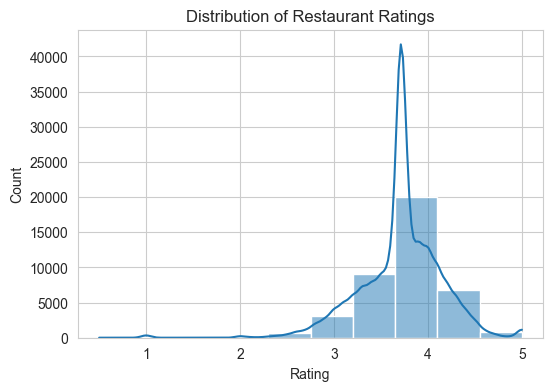

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df['rate'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Online Order vs Rating')
plt.show()


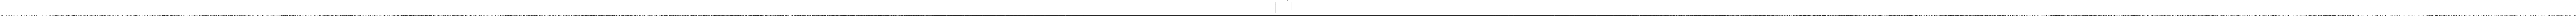

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Table Booking vs Rating')
plt.show()


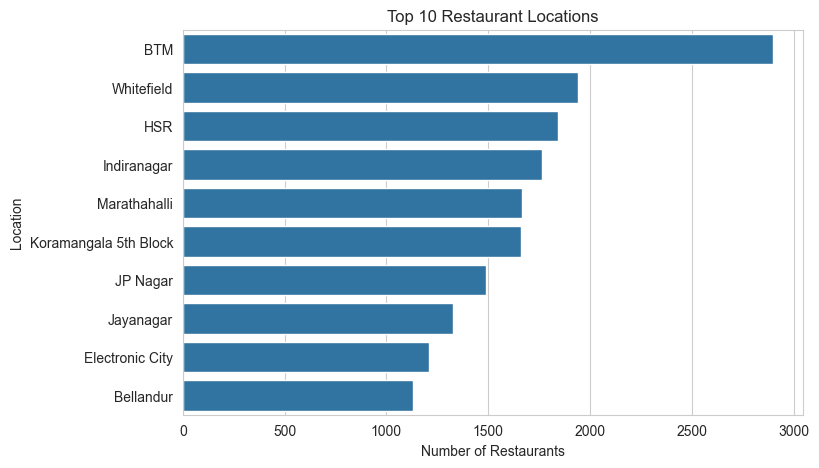

In [57]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Restaurant Locations')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


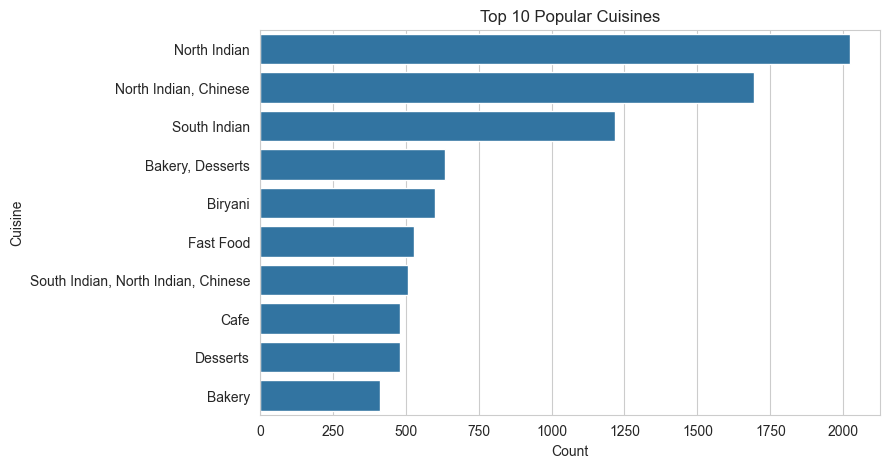

In [54]:
top_cuisines = df['cuisines'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()


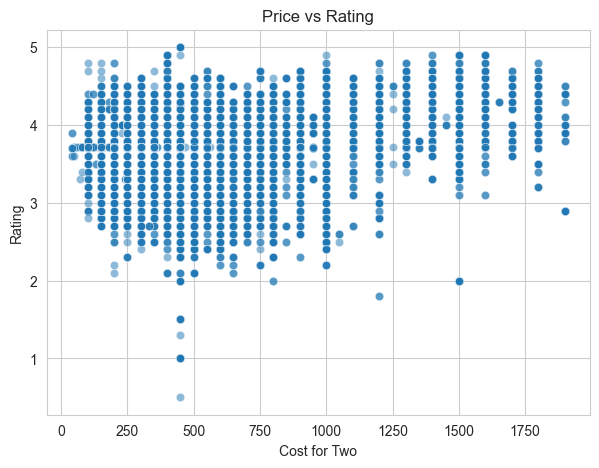

In [58]:
filtered_df = df[df['Cost2Plates'] < 2000]

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Cost2Plates',
    y='rate',
    data=filtered_df,
    alpha=0.5
)
plt.title('Price vs Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()


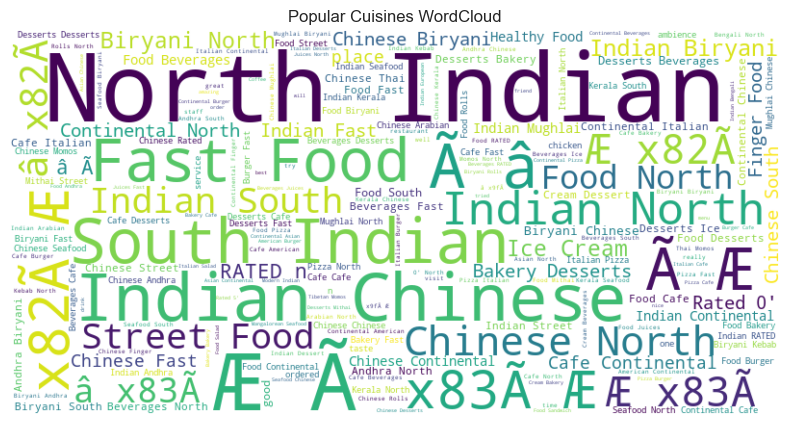

In [62]:
from wordcloud import WordCloud

cuisine_text = ' '.join(df['cuisines'].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(cuisine_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Cuisines WordCloud')
plt.show()
